# Datasets & DataLoaders

## Loading a Dataset

- [Fashion-MNIST](https://research.zalando.com/project/fashion_mnist/fashion_mnist/) dataset from TorchVision.
- Fashion-MNIST is a dataset of Zalando’s article images consisting of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes.

We load the [FashionMNIST Dataset](https://pytorch.org/vision/stable/datasets.html#fashion-mnist) with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

## Iterating and Visulaizing the Dataset

We can index ``Datasets`` manually like a list: ``training_data[index]``.
We use ``matplotlib`` to visualize some samples in our training data.

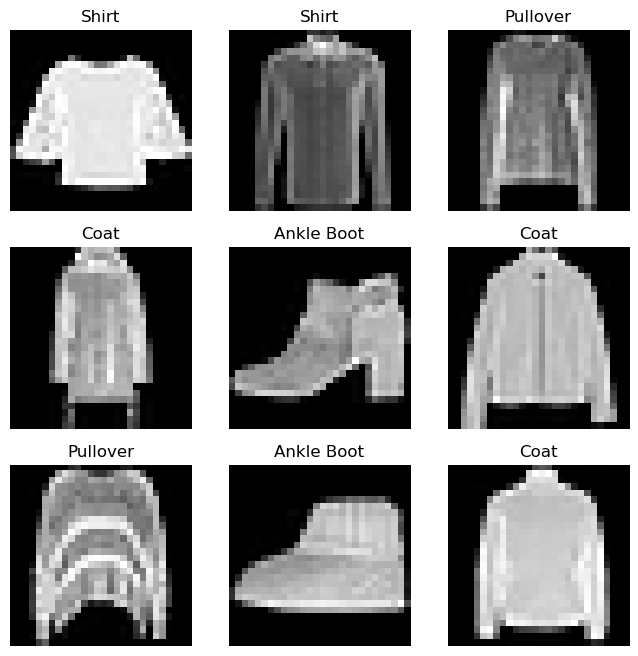

In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize = (8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):

    # taking a random index in the range 0 to length of training_data
    sample_idx = torch.randint(len(training_data), size = (1,)).item()

    # training_data[i] returns image and the labelof the image.
    img, label = training_data[sample_idx]          

    # Visualizing the images
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")
plt.show()

## Creating a Custom Dataset for your files
- A custom Dataset class must implement three functions: `__init__`, `__len__`, and `__getitem__`.

In [3]:
import os
import pandas as pd
from torchvision.io import read_image   # Reads a JPEG or PNG image into a 3 dimensional RGB
                                        # or grayscale Tensor. Optionally converts the image
                                        # to the desired format. The values of the output 
                                        # tensor are uint8 in [0, 255].

class CustomImageDataset(Dataset):      # A class inheriting from the parent class "Dataset" - provided by pytorch.
    def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
        self.img_labels = pd.read_csv(annotations_file)  
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self, img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(image_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


### __init__

`class CustomImageDataset(Dataset)`: This line declares a new class named `CustomImageDataset which` inherits from the Dataset class provided by PyTorch. Inheriting from Dataset allows you to create a custom dataset that can be used with PyTorch's data loading utilities.

`def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):`
 This is the initialization method (constructor) for the CustomImageDataset class. It takes several parameters:

- `annotations_file:` A string specifying the file path of the annotations file. This file likely contains information about the images in the dataset, such as their labels or other relevant metadata.
- `img_dir`: A string specifying the directory path where the images are stored.
- `transform:` An optional argument representing a transformation to be applied to the images. This transformation could include operations like resizing, cropping, or data augmentation.
- `target_transform`: An optional argument representing a transformation to be applied to the target labels (if applicable). This transformation could include encoding categorical labels or any other desired processing.


### __len__

The __len__ function returns the number of samples in our dataset.

The` __getitem__` method is a required method in a PyTorch dataset class. It defines how to retrieve an item (image and label) from the dataset given an index (idx).

Here's a breakdown of what each part of the` __getitem__ `method does:

- `img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]):` This line constructs the file path of the image corresponding to the given index idx. It uses os.path.join to combine self.img_dir (the directory path where the images are stored) with the first column (0th index) of the img_labels DataFrame at the specified index.

- `image = read_image(image_path):` This line reads the image file located at img_path. The function read_image is used to read the image from the file. You might need to define or import this function separately in your code.

- `label = self.img_labels.iloc[idx, 1]:` This line retrieves the label for the image at the given index idx from the img_labels DataFrame. It selects the value from the second column (1st index) of the DataFrame.

- `if self.transform: image = self.transform(image):` This line applies the transformation (self.transform) to the image if it is defined. The transformation could include resizing, normalization, or any other image processing operations.

- `if self.target_transform: label = self.target_transform(label):` This line applies the target transformation (self.target_transform) to the label if it is defined. This transformation could include encoding categorical labels or any other desired processing.

- `return image, label:` This line returns the processed image and its corresponding label as a tuple.

By implementing the __getitem__ method in the CustomImageDataset class, you enable the dataset object to be accessed similar to a Python list or array, allowing you to retrieve individual items (images and labels) using indexing (dataset[idx]). This method is used when iterating over the dataset using a DataLoader or when directly accessing elements from the dataset.

# Preparing your data for training with DataLoaders

- While training a model we typically want to pass samples in "minibatches", reshuffle the data at every epoch to reduce model overfitting
- Use Python's `multiprocessing` to speed up data retrieval.
- DataLoader is an iterable that abstracts this complexity for us in an easy API. 

In [4]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
train_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

# Iterate through the DataLoader
- Each iteration below returns a batch of ``train_features`` and ``train_labels`` (containing ``batch_size=64`` features and labels respectively).
- Because we specified ``shuffle=True``, after we iterate over all batches the data is shuffled


Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
torch.Size([28, 28])


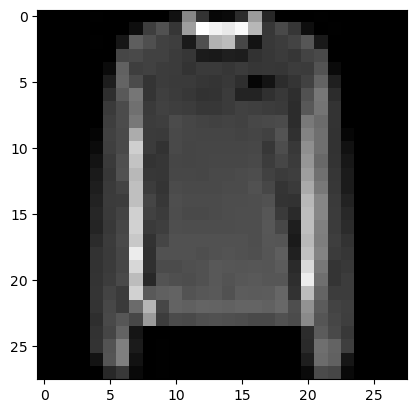

Lable: 2


In [10]:
# Display image and label
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]

print(img.shape)

plt.imshow(img, cmap = "gray")
plt.show()
print(f"Lable: {label}")

- `train_features, train_labels = next(iter(train_dataloader)):` This line retrieves a batch of data from the train_dataloader by calling `next(iter(train_dataloader))`. The `iter()` function creates an iterator from the train_dataloader, and `next()` fetches the next batch of data from the iterator. The batch consists of train_features (images) and train_labels (labels).

- `img = train_features[0].squeeze():` This line extracts the first image from the feature batch (train_features) and uses the `squeeze()` function to remove any dimensions with a size of 1. This is done to ensure that the image tensor has the expected shape for visualization.